# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
# INPORTANDO OS PACOTES E BIBLIOTECAS NECESSARIAS:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# CRIANDO UMA NOVA COLUNA COM OS net_bill
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
# PEGANDO OS DADOS INPORTANTES
tips1 = tips[['tip_pct', 'net_bill']]
tips1.head()

,tip_pct,net_bill
0,0.063204,15.98
1,0.191244,8.68
2,0.199886,17.51
3,0.162494,20.37
4,0.172069,20.98


In [8]:
# CALCULANDO A CORRELAÇÃO
tips1.corr()

,tip_pct,net_bill
tip_pct,1.000000,-0.302144
net_bill,-0.302144,1.000000


(0.0, 4.53285)

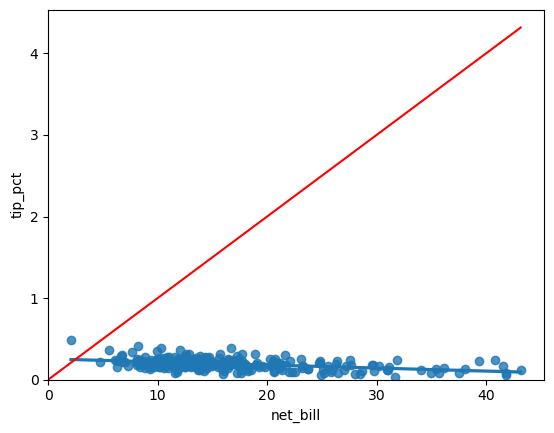

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

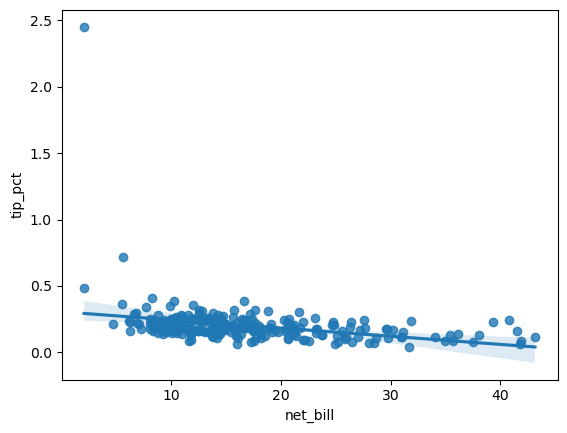

In [24]:
# VENDO A DISPERSSÃO DOS DADOS EM RELAÇÃO A LINHA DE TENDENCIA.
tips['y'] = np.log((tips['net_bill'] - (tips['net_bill'].min() - 0.1))) + np.random.randn(len(tips)) * 0.05
tips['y'] = tips['y'] - tips['y'].mean()

sns.regplot(x='net_bill', y='tip_pct', data=tips)

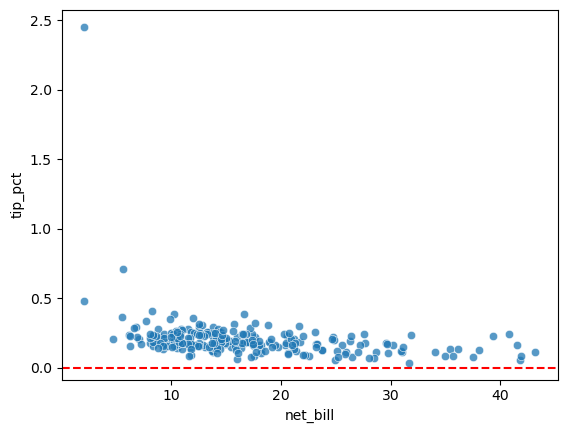

In [25]:
# ANALISANDO OS RESIDUOS.
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           2.35e-13
Time:                        21:20:23   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

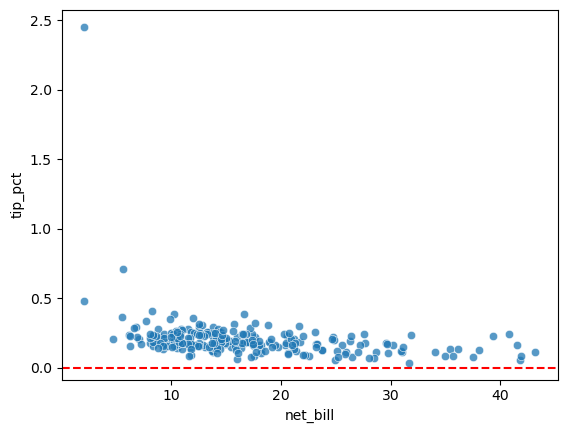

In [42]:
# AGORA VAMOS AJUSTAR O NOSSO MODELO UTILIZANDO A FUNÇÃO LOG
reg1 = smf.ols('tip_pct ~ np.log(net_bill + 0.1)', data=tips).fit()
print(reg1.summary())
tips['res'] = reg1.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

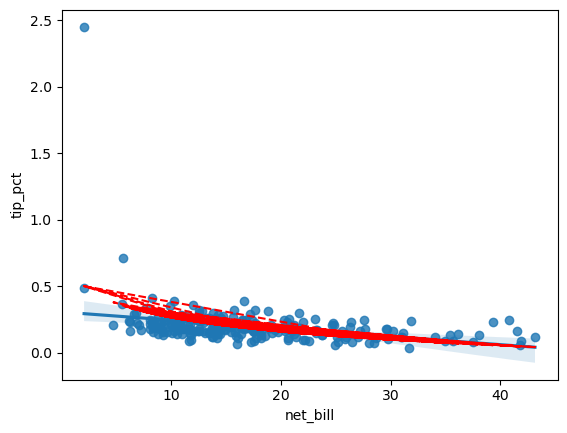

In [43]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg1.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.06e-09
Time:                        21:20:30   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

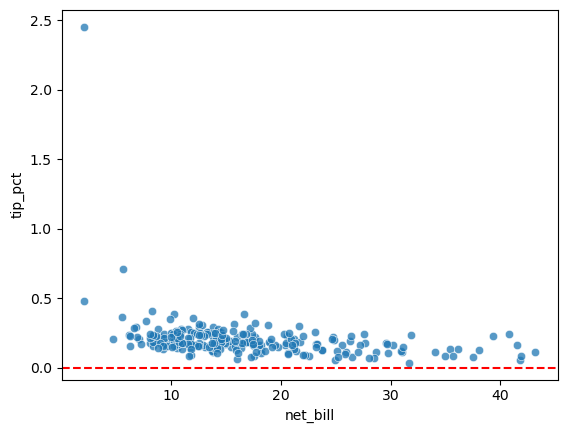

In [44]:
reg2 = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print(reg2.summary())
tips['res'] = reg2.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

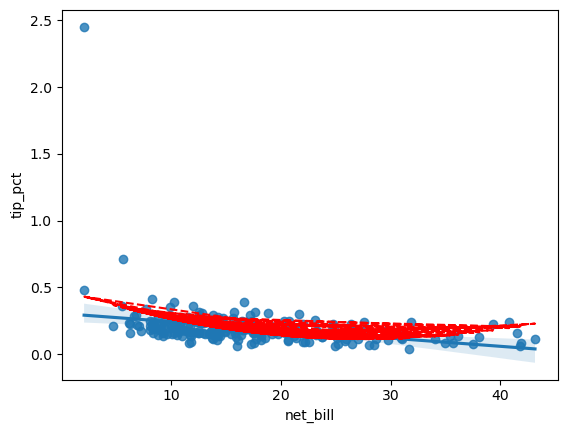

In [45]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg2.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

Vamso trabalhar encima da variavel resposta agora

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.52e-06
Time:                        21:42:56   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

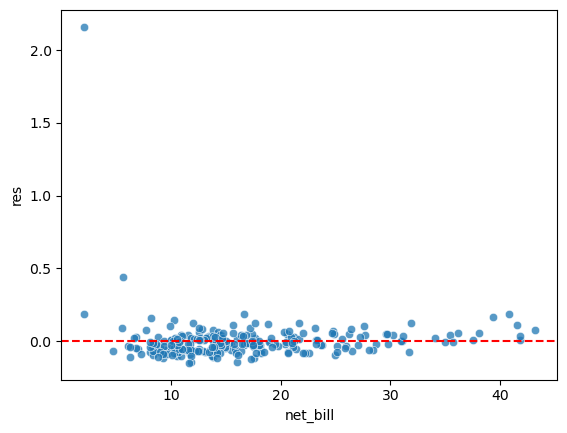

In [55]:
# Log na vairavel resposta usando o pasty
reg4 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

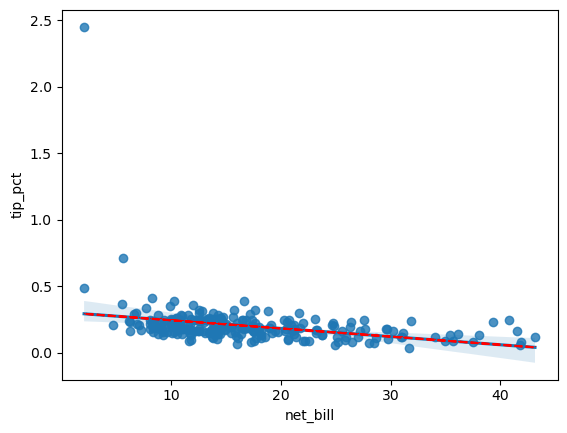

In [58]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg4.fittedvalues, 'r,--')


In [61]:
tips['pred_y'] = np.exp(reg4.fittedvalues)
r_squared_pred = tips[['pred_y', 'tip_pct']].corr().iloc[0, 1] ** 2
print(f"R^2 para a previsão: {r_squared_pred}")

R^2 para a previsão: 0.09654187666478928


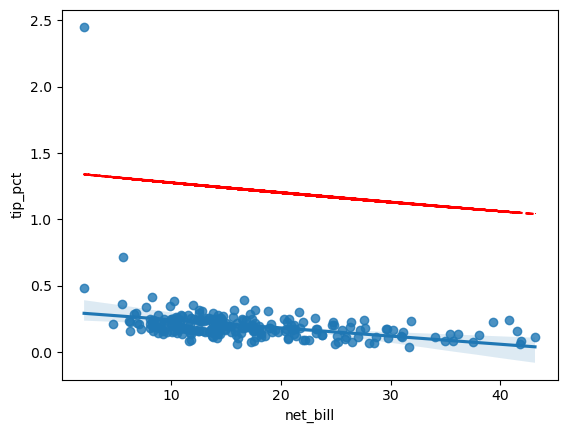

In [62]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], np.exp(reg4.fittedvalues), 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

###  6. qual modelo resultou no melhor ajuste?